# Reading and plotting single datasets

To be able to work with the datascience package you first need to import the necessary modules with the *install_packages* notebook. After that you can import the needed modules.

In [1]:
import os
from datetime import datetime
import matplotlib.pyplot as plt
from datascience.read import Era5, Era5Land, AscatDataH121, Gldas
from datascience.plot import plot_gpis, plot_ts

%matplotlib widget

ERROR 1: PROJ: proj_create_from_database: Open of /home/oscipal/my_conda/share/proj failed


Beware that Era-5, Era-5-Land and ASCAT data have a different format than the common GeoTIFF. Data is divided into 2591 cells (5°x5°) (https://ecmwf-models.readthedocs.io/en/latest/_images/5x5_cell_partitioning.png), and each cell contains a different number of grid points, the number of grid points varies per cell and the spatial resolution varies by dataset. Also the data is saved in a single file for each cell however it is still possible to only access the information of a single grid point.

The loading of Era-5, Era-5-Land, ASCAT and GLDAS data work the same way. We will look at Era-5 data in this example.

First, you need to create an Era-5 Object. Note that if you want to read the data of a whole cell (up to 2004 grid points) you should set the parameter *read_bulk=True*, if you only want to read a single grid point set the parameter to *False*.

In [2]:
obj = Era5(read_bulk = False)

To see the spatial distribution of the grid points more clearly you can plot them around a specific location (lon, lat) or a specific gpi. We can use cartopy and the *plot_gpis* function to do so.

In [3]:
lat = 48.198905
lon = 16.367182
gpi = 240545

The red grid-lines show the cell, the red marker show the location and the blue markers the grid points. If you hover over the markers you can see the index, the cell id and the distance to the location. The closest gpi is highlighted. You can choose how many grid points you want to show.

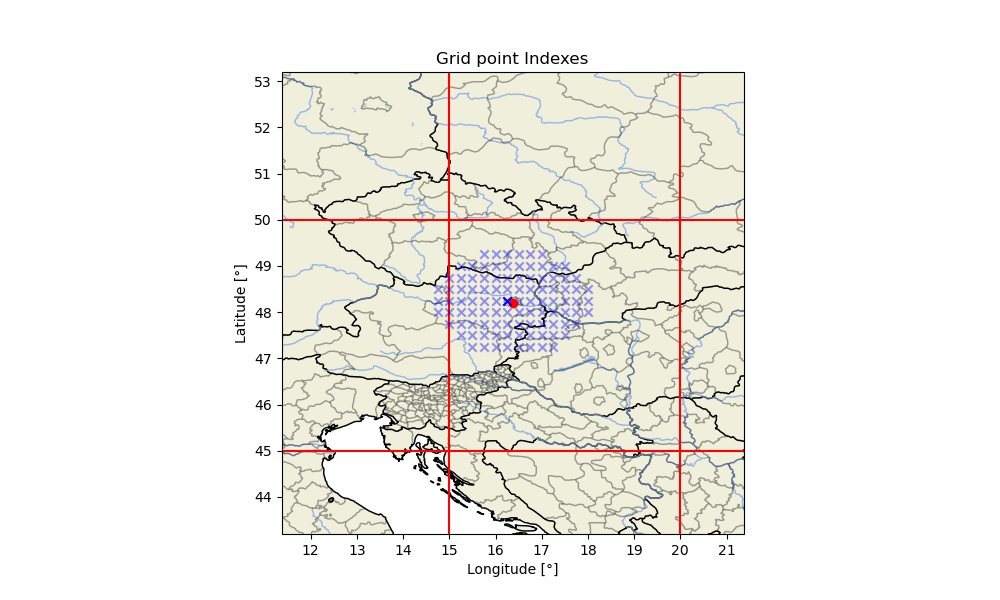

In [4]:
plot_gpis((lon, lat), obj, k=100)

With the function *.read* you can load the data into memory. You can either give the grid point index or lon and lat coordinates. When giving coordinates the closest grid point will be chosen automatically.

In [5]:
data = obj.read(gpi)
data

,sd,swvl1,stl1,t2m,tp
2007-01-01 00:00:00,0.0,0.302173,0.328033,0.814789,-1.862645e-09
2007-01-01 06:00:00,0.0,0.303294,-0.291962,3.442963,2.891198e-05
2007-01-01 12:00:00,0.0,0.302788,0.924255,9.458008,-1.862645e-09
2007-01-01 18:00:00,0.0,0.304668,3.360138,9.525238,1.605600e-06
2007-01-02 00:00:00,0.0,0.303041,5.121643,6.744995,-1.862645e-09
...,...,...,...,...,...
2022-12-31 18:00:00,0.0,0.361364,5.658051,6.731842,0.000000e+00
2023-01-01 00:00:00,0.0,0.357999,2.498505,4.327454,1.862645e-09
2023-01-01 06:00:00,0.0,0.355933,2.354004,1.829926,1.324341e-06
2023-01-01 12:00:00,0.0,0.354037,6.093079,7.663239,1.862645e-09


In [6]:
data = obj.read(lon, lat)
data

,sd,swvl1,stl1,t2m,tp
2007-01-01 00:00:00,0.0,0.302173,0.328033,0.814789,-1.862645e-09
2007-01-01 06:00:00,0.0,0.303294,-0.291962,3.442963,2.891198e-05
2007-01-01 12:00:00,0.0,0.302788,0.924255,9.458008,-1.862645e-09
2007-01-01 18:00:00,0.0,0.304668,3.360138,9.525238,1.605600e-06
2007-01-02 00:00:00,0.0,0.303041,5.121643,6.744995,-1.862645e-09
...,...,...,...,...,...
2022-12-31 18:00:00,0.0,0.361364,5.658051,6.731842,0.000000e+00
2023-01-01 00:00:00,0.0,0.357999,2.498505,4.327454,1.862645e-09
2023-01-01 06:00:00,0.0,0.355933,2.354004,1.829926,1.324341e-06
2023-01-01 12:00:00,0.0,0.354037,6.093079,7.663239,1.862645e-09


You can find out about the meaning of the parameters with *https://codes.ecmwf.int/grib/param-db/?search=sd*, beware that the temperature unit is °C not K.

You can now plot the data.

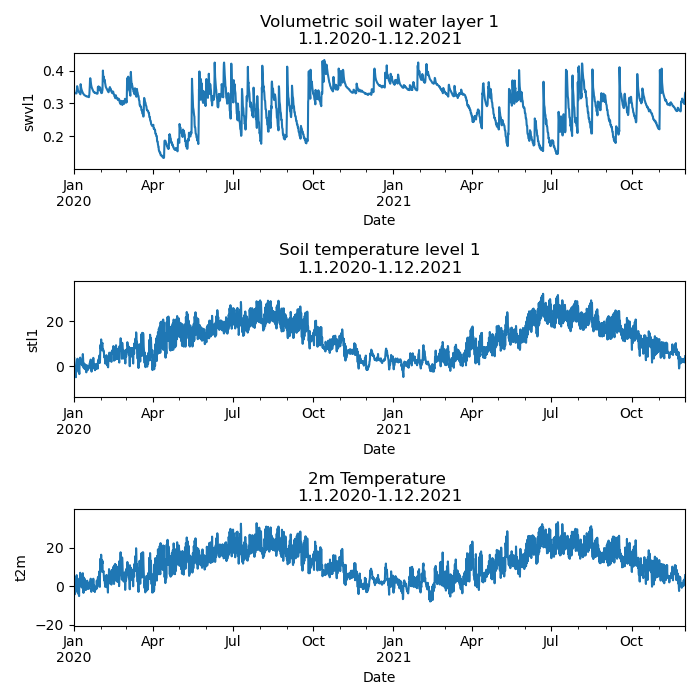

In [7]:
fig, ax = plt.subplots(3,1, figsize=(7,7))

data["swvl1"].plot(ax=ax[0])
ax[0].set_xlim([datetime(2020,1,1), datetime(2021,12,1)])
ax[0].set_ylabel("swvl1")
ax[0].set_xlabel("Date")
ax[0].set_title("Volumetric soil water layer 1\n1.1.2020-1.12.2021")

data["stl1"].plot(ax=ax[1])
ax[1].set_xlim([datetime(2020,1,1), datetime(2021,12,1)])
ax[1].set_ylabel("stl1")
ax[1].set_xlabel("Date")
ax[1].set_title("Soil temperature level 1\n1.1.2020-1.12.2021")

data["t2m"].plot(ax=ax[2])
ax[2].set_xlim([datetime(2020,1,1), datetime(2021,12,1)])
ax[2].set_ylabel("t2m")
ax[2].set_xlabel("Date")
ax[2].set_title("2m Temperature \n1.1.2020-1.12.2021")

plt.tight_layout()
plt.show()

You can also use the *plot_ts* function. When giving a *fname* the plot will be saved.

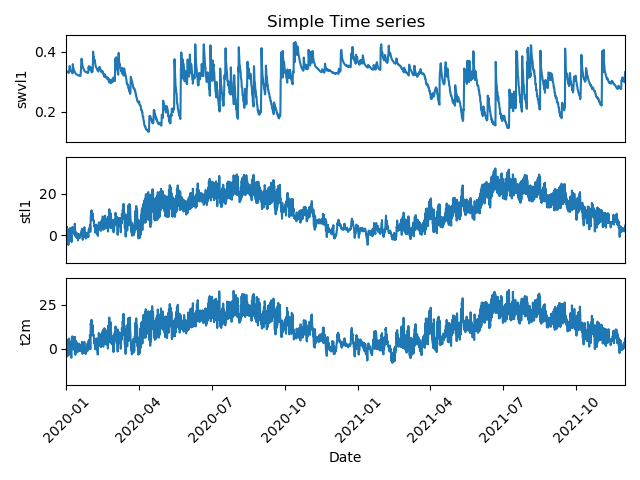

In [8]:
params = ["swvl1", "stl1", "t2m"]
timeperiod = [datetime(2020,1,1), datetime(2021,12,1)]
plot_ts(data, params, timeperiod, title="Simple Time series", fname="simple_ts.png")